In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

# 从模型到产品

我们在<<chapter_intro>>中看到的六行代码，还只是实践中使用深度学习的一小部分。在这一章，我们计划利用一个计算机视觉的示例，来研究构建一个端到端的深度学习应用程序的过程。
更具体地说，我们将构建一个熊分类器！
在这个过程在，我们将会讨论深度学习的能力和限制，探索如何创建数据集，研究实际应用深度学习过程中可能出现的问题，等等。
许多关键点同样适用于其他深度学习问题，例如我们在<<chapter_intro>>中提到的那些。
如果你处理的问题在关键方面与我们的示例问题相似，我们希望你能用少量的代码快速获得优异的结果。

让我们从你要如何界定自己的问题开始。


## 深度学习实践

我们已经看到，深度学习能够用少量的代码快速解决许多富有挑战的问题。
作为一个初学者，有一个与我们的示例非常相似的最佳问题，并且你可以很快获得非常有用的结果。
然而，深度学习不是魔法！
同样的刘航代码不能用于今天任何人都能够想到的每个问题。
低估深度学习的限制，高估深度学习的能力，可能会导致令人沮丧的糟糕结果，至少在你获得一些经验并且能够解决出现的问题之前是这样的。
相反，高估深度学习的限制，低估深度学习的能力，可能意味着你不会尝试一个可解决的问题，因为你会说服你自己放弃它。

我们经常与那些低估深度学习限制和能力的人交谈。
这两者都可能是问题：低估能力意味着你甚至可能不会去尝试某些事情，即使这些事情很有益，而低估限制可能意味着你无法考虑和应对重要的问题。

最好的做法是保持开放的心态。
深度学习可能用比你预期的更少的数据或复杂度解决部分问题，如果你对这一可能性保持开放的态度，那么就有可能设计一个程序，找到与特定问题相关的特定能力和限制。
这并不意味着任何风险赌注————我们将向你展示如何逐步推出模型，使其不会产生重大风险，甚至可以在投入生产之前对其进行回溯测试。

### 开启你的项目

所以，你要从哪里开始自己的深度学习之旅呢？
最重要的是确保自己有一些要做的项目————只有通过自己的项目，你猜能获得创建和使用模型的真正经验。
在选择一个项目时，数据可用性是最重要的考虑因素。
无论你做一个项目是为了学习还是为了在组织中的实际应用，你都想要一些可以快速开始的东西。
我们见过很多学生、研究人员和行业从业者浪费数月甚至数年，试图找到他们心目中完美的数据集。
找到“完美”的数据集不是目标，而是迭代的起点。

如果你采用这种方法，那么当完美主义者还处于计划阶段时，你已经进行第三次学习和改进了！

我们还建议你在项目中从头到尾进行迭代；也就是说，不要花费几个月的时间微调你的模型，或是打磨完美的GUI，又或是标记完美的数据集...相反，在合理的时间内尽可能做好每一步，一直到最后。
例如，如果你的最终目标是一款手机应用程序，那么这应该是你在每次迭代后都拥有的。
不过，在迭代的早期阶段，你也许可以走一些捷径，例如在远程服务器上进行所有的处理，并使用简单的响应式Web应用。
通过端到端地完成项目，你将会看到最棘手地部分在哪里，以及哪部分对最终的结果影响最大。

在您阅读本书的过程中，我们建议您通过运行和调整我们提供的notebook完成许多小实验，同时逐渐开发自己的项目。
这样，在我们讨论的过程中，你将会获得我们所解释的全部工具和技术的经验。

> s: 为了充分利用这本书，在每一章之间花点时间进行实验，无论是在你自己的项目中，还是利用我们提供的notebook。然后尝试在新的数据集上从头重写那些notebook。只有通过大量的练习（和失败），你才会对如何训练一个模型有直觉。

通过使用端到端的迭代方法，你也会更好地了解你真正需要的数据量。
例如，你可能发现你只能轻松地获得200个带标签的数据项，但在你无法在尝试之前知道，这些数据是否足够获得应用程序在实践中正常工作所需的性能。

在组织环境中，通过向你的同事展示一个真实的工作原型，你能够向他们展示你的想法确实可能。
我们反复观察到，这是项目获得良好的组织上认可的秘诀。

由于从一个有可用数据的项目开始是最容易的，这意味着从一个你已经开始做的事情相关的项目开始是最容易的，因为你已经有了相关的数据。
例如，如果你从事音乐行业，你可能能够访问许多录音。
如果你是一名放射科医生，你可能会接触大量的医学图像。
如果你对保护野生动物感兴趣，你可能会接触到很多野生动物的图像。

有时，你必须有点创造力。
也许你可以找到一些以前的机器学习项目，例如Kaggle竞赛，这与你感兴趣的领域有关。
有时，你不得不妥协。
你可能找不到满足你心目中精确项目所需的确切的数据；但是，你可能能从类似的领域找到一些东西，或者通过不同的测量方式，解决一个稍微不同的问题。
在这些类似的项目上工作，仍然会让你对整个过程有一个很好的理解，并且可能帮助你发现其他的捷径、数据源等等。

特别是当你刚开始接触深度学习时，把它扩展到非常不同的领域，或是把深度学习放置在以前没有应用过的地方，这并不是一个好主意。
这是因为，如果你的模型一开始并不工作，你将不知道是不是由于你犯了一个错误，还是你尝试解决的问题根本无法用深度学习来解决。
而且你并不知道去哪里寻求帮助。
因此，一开始最好的方法是，在网上找一个例子，在这个例子中，有人在某些领域取得了良好的结果，至少在与你试图实现的目标相似的领域，或者将你的数据转换为其他人使用过的格式类似的格式（例如根据你的数据创建图像）。
让我们来看看深度学习的现状，让你知道深度学习现在擅长什么样的事情。

### 深度学习现状

让我们从考虑深度学习是否能很好地解决你想要解决的问题开始。
本节概述了2020年初深度学习的现状。
然而，事物发展地非常快，并且在你阅读本文的同时，其中一些限制可能已经不存在了。
我们将努力尝试使[本书的网站](https://book.fast.ai/)保持更新；此外，谷歌搜索“人工智能现在能做什么”可能会提供最近的信息。



#### 计算机视觉

在许多领域，深度学习还没有被用于分析图像，但是在深度学习已经尝试过的领域几乎普遍表明，计算机至少能够像人类一样识别图像中的事物，甚至是像经受过专业训练的人，例如放射科医生。
这就是所谓的*对象识别*。
深度学习同样擅长识别图像中的对象，并且突出显示它们的位置，命名每个找到的对象。
这被称为*对象检测*（我们在<<chapter_intor>>看到了这种方法的变体，其中每个像素都根据它是什么对象的一部分进行分类，这被称为*分割*）。
深度学习算法通常不擅长识别在结构或者风格上与训练使用的图像有着明显不同的图像。
例如，如果训练数据中没有黑白图像，那么模型可能在黑白图像上表现不佳。
类似的，如果训练数据中不包含手绘图像，那么模型在手绘图像可能表现不佳。
没有检查训练集缺少那类图像的通用的方法，但是我们将在本章中展示一些方法，当模型在生产环境中投入使用时，可以尝试这些方法识别何时出现意料之外的图像类型（这被称为检查*域外数据*）。

对象检测系统的主要挑战之一是，图像标记工作可能缓慢并且昂贵。
目前，仍有很多工作要做，才能形成使标记更快更容易的工具，从而用更少的手工标记来训练更准确的对象检测模型。
一种特别有用的方法是，综合生成输入图像的变体，例如通过旋转或是改变它们的亮度、对比度；这被称为*数据增强*，同样适用于文本和其他类型的模型。
我们将会在本章中对此进行详细讨论。


另一点需要考虑的是，尽管你的问题看起来不像是一个计算机视觉问题，但只要有一点想象力，就可能把它变成一个类似的问题。
例如，你打算对声音进行分类，你可能会去尝试把声音转换为声波波形的图像，然后在这些图像上训练模型。


#### 文本（自然语言处理，NLP）

计算机非常擅长根据垃圾邮件或非垃圾邮件、情绪（例如，评论是正面还是负面）、作者、源网站等类别对长短文本进行分类。
我们不知道在这一领域有将计算机与人类对比的严格工作，但在我们开来，深度学习在这些任务上与人类表现相似。
深度学习同样非常擅长生成上下文相关的文本，例如对社交媒体帖子的回复，以及模仿特定作者的风格。
它同样擅长让这些内容更吸引人————事实上，甚至比人类生成的文本更加吸引人。
然而，最近的深度学习不擅长生成*正确*的回应！
例如，我们现在没有可靠的方法将医学信息知识库与深度学习模型相结合，从而生成正确的医学自然语言回应。
这是非常危险的，因为它很容易创造出引人注目但完全不正确的内容误导外行。

另一个令人担忧的问题是，社交媒体上，上下文相关、极具说服力的回应可能会被大规模使用，其规模可能是曾经看到的巨魔农场的数千倍，用于传播虚假消息、制造动乱和鼓励冲突等。
根据经验，文本生成模型在技术上总是比自动识别生成文本的模型领先一点。
例如，使用一个识别人工生成内容的模型，去实际改进创建内容的模型，直到分类模型无法完成分类任务。

尽管存在这些问题，深度学习在NLP中仍然有很多应用：它可以被用于翻译文本，将长文本总结成可以快速消化理解的东西，找到所有感兴趣的概念等等。
不幸的是，翻译或者摘要很可能包含完全错误的信息！
然而，他们的性能已经足够好了，很多人都在使用这些系统————例如，谷歌的在线翻译系统（以及我们知道的所有其他在线系统）都是基于深度学习的。

#### 结合文本和图像

通常，深度学习将文本和图像结合成单个模型的能力，已经远远超出了大多数人的预期。
例如，一个深度学习模型能够在输入图像上训练，并输出英文书写的标题，而且能为新图像自动生成令人惊讶的合适标题！
但同样，我们有与上一节中讨论过的相同的警告：无法保证这些标题的正确性。

由于这个问题的严重性，我通常建议，不要将深度学习作为一个完全自动化的过程，而是作为模型与人类用户密切互动的过程。
这可能会使人类的生产力比完全手工操作的方法高几个数量级，并且实际上人类单独操作更准确。
例如，一个自动化系统可以通过CT扫描直接识别潜在的中风患者，并且发送一个高高优先级的报警，以便快速查看这些扫描结果。
治疗中风的时间只有三个小时，所以这种快速的反馈回路可以拯救生命。
然而，与此同时，所有的扫描以相同的方式持续不断地发送给放射科医生，因此不会减少人力的投入。
其它的深度学习模型能自动测量扫描中的事物，并将测量结果插入到报告中，警告放射科医生他们可能错过的发现，并且告诉他们其他可能相关的案例。 

#### 表格数据

在分析时间序列和表格数据方面，深度学习最近取得了很大的进展。
然而，深度学习通常作为多种类型的模型集合的一部分。
如果你已经有一个随机森林或是梯度提升机（一种流行的表格建模工具，你很快就会了解到）的系统，那么切换到或者添加深度学习可能不会带来任何显著提升。
深度学习确实大大增加了你可以包含的列的种类，例如，自然语言（书名、评论等）以及高基数列（包含大量离散选择的东西，如邮政编码或产品ID）。
从侧面看，深度学习通常比随机森林或梯度提升机花费更长的训练时间，尽管由于[RAPIDS](https://rapids.ai/)等库的出现，这种情况正在改变，因为这些库为整个建模流程提供了GPU加速。
我们将在<<chapter_tabular>>中详细介绍所有这些方法的优缺点。

#### 推荐系统

推荐系统实际上只是一种特殊类型的表格数据。
特别是，它们通常有一个代表用户的高基数分类变量，另一个代表产品（或者类似的东西）。
像亚马逊这样的公司将其客户的每一次购买都表示为一个巨大的稀疏矩阵，以客户为行，以产品为列。
一旦他们有了这种格式的数据，数据科学家就会应用某种形式的协同过滤来*填充矩阵*。
例如，如果客户A购买产品1和产品10，而客户B购买产品1、2、4、10，那么引擎将建议客户A购买产品2和4。
因为深度学习模型擅长处理高基数分类变量，所以他们非常擅长处理推荐系统。
当这些变量与其他类型的数据（例如自然语言或者图像）组合时，它们尤其发挥作用，就像表格数据一样。
他们还可以很好地将所有这些类型的信息与表示为表格的附加元数据结合起来，例如用户信息、以前的交易等。

然而，几乎所有的机器学习方法都有一个缺点，即它们只会告诉您特定用户可能喜欢什么产品，而不是告诉您哪些建议对用户有帮助。
对用户可能喜欢的产品的多种推荐可能根本没有帮助————例如，如果用户已经熟悉这些产品，或者如果它们只是他们已经购买的产品的不同包装（例如一套盒装的小说，当他们已经拥有该集中的每个项目时）。 
Jeremy 喜欢阅读Terry Pratchett的书，有一段时间亚马逊只向他推荐Terry Pratchett的书（见下图），这真的没有帮助，因为他已经知道这些书了！

![](../images/02.production/pratchett.png)


#### 其他数据类型

通常你会发现特定领域的数据类型非常适合现有类别。
例如，蛋白质链看起来很像自然语言文档，因为它们是离散标记的长序列，在整个序列中具有复杂的关系和含义。
事实上，事实证明，使用 NLP 深度学习方法是当前许多类型蛋白质分析的最先进方法。
再举一个例子，声音可以表示为频谱图，可以将其视为图像；标准的图像深度学习方法被证明在频谱图上非常有效。

### 传动系统方法

有许多对任何人都没有用的准确模型，以及许多非常有用的不准确模型。
为确保你的建模工作在实践中有用，你需要考虑如何使用你的工作。 
2012 年，Jeremy 与 Margit Zwemer 和 Mike Loukides 一起引入了一种*传动系统方法*来思考这个问题。

["Designing Great Data Products"](https://www.oreilly.com/radar/drivetrain-approach-data-products/)中详细描述了传动系统方法，如下图所示。
基本思想是从考虑你的目标开始，然后考虑你可以采取哪些行动来实现该目标以及您拥有（或可以获得）哪些数据可以提供帮助，然后构建一个模型，你可以使用该模型来确定要采取的最佳行动，以根据您的目标获得最佳结果。

![](../images/02.production/drivetrain-approach.png)

考虑自动驾驶汽车中的一个模型：你想帮助汽车在没有人为干预的情况下从A点安全地行驶到B点。
优秀的预测建模是解决问题的重要组成部分，但它并不能独立存在；随着产品变得更加复杂，预测建模的作用逐渐融入到产品的内部，成为产品的一部分。
使用自动驾驶汽车的人完全不关心数百（如果不是数千）模型和使其工作的 PB 级数据。但随着数据科学家构建越来越复杂的产品，他们需要一种系统的设计方法。


我们使用数据不仅仅是为了生成更多的数据（以预测的形式），而是为了产生*可操作的结果*。这就是“传动系统方法”的目标。
首先要定义一个清晰的*目标*。
例如，Google在创建他们的第一个搜索引擎时考虑了“用户在输入搜索查询时的主要目标是什么？”
这使得他们的目标是“显示最相关的搜索结果”。
下一步是考虑你可以拉动哪些*杠杆*（即可以采取哪些行动）来更好地实现这个目标。
在Google的例子中，这就是搜索结果的排名。
第三步是考虑他们需要哪些新的*数据*来产生这样的排名；他们意识到关于哪些页面链接到哪些其他页面的隐含信息可以用于此目的。
仅在完成了这前三个步骤后，我们才开始考虑构建预测*模型*。
我们的目标和可用杠杆，我们已经拥有的数据以及我们需要收集的任何附加数据，决定了我们可以构建的模型。
这些模型将把杠杆和任何不可控变量作为它们的输入；模型的输出可以组合在一起，以预测我们目标的最终状态。

让我们考虑另一个例子：推荐系统。
推荐引擎的*目标*是通过向客户推荐在没有推荐的情况下不会购买的商品来使他们感到惊讶和高兴来推动额外的销售。
*杠杆*是推荐的排名。
新*数据*必须被收集以生成*新销售*的建议。
这将需要进行许多随机实验，以便为广泛的客户收集有关广泛建议的数据。这是很少有组织采取的步骤；但如果没有它，您就没有根据您的真实目标（更多销售！）实际优化建议所需的信息。

最后，你可以构建两个购买概率*模型*，以看到或不看到推荐为条件。
这两个概率之间的差异是针对给定客户推荐的效用函数。
如果算法推荐一本客户已经拒绝的熟悉的书（两个分量都很小），或者即使没有推荐他们也会购买的一本书（两个分量都很大并且相互抵消），概率差异将会很低。

如你所见，在实践中，模型的实际实施通常需要的不仅仅是训练模型！
你通常需要运行实验来收集更多数据，并考虑如何将您的模型整合到您正在开发的整个系统中。
说到数据，现在让我们关注如何为你的项目查找数据。

## 收集数据

对于许多类型的项目，您可以在线找到所需的所有数据。我们将在本章中完成的项目是*熊检测器*。
它将区分三种熊：灰熊、黑熊和泰迪熊。
互联网上有很多我们可以使用的每种熊的图片。
我们只需要一种方法来找到它们并下载它们。
我们提供了一个可用于此目的的工具，因此您可以按照本章的说明为您感兴趣的任何类型的对象创建自己的图像识别应用程序。
在 fast.ai 课程中，成千上万的学生已经在课程论坛上展示了他们的工作，展示了从特立尼达的蜂鸟品种到巴拿马的公共汽车类型的所有内容————一名学生甚至创建了一个应用程序，可以帮助他的未婚妻在圣诞假期期间认出他的16个堂兄弟姐妹！


在撰写本文时，必应图像搜索是我们所知的查找和下载图像的最佳选择。
每月最多可免费查询1000次，每次查询最多可下载150张图片。
然而，在我们写这本书和您阅读这本书之间可能会发生一些更好的事情，所以请务必查看[本书的网站](https://book.fast.ai/)以获取我们最新的推荐。

> 重要：与最新服务保持联系：可用于创建数据集的服务一直在变化，它们的功能、界面和定价也经常变化。在本节中，我们将展示如何使用编写本书时可用的必应图像搜索API。我们将在[本书的网站](https://book.fast.ai/)上提供更多选项和更多最新信息，因此请务必立即查看该网站以获取有关如何从Web下载图像以创建深度学习数据集的最新信息。

# 清除

要使用必应图像搜索下载图像，请在[Microsoft Azure](https://azure.microsoft.com/en-us/services/cognitive-services/bing-web-search-api/)上注册一个免费帐户。
您将获得一个密钥，您可以复制该密钥并将其输入单元格中，如下所示（将“XXX”替换为您的密钥并执行）：

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', 'XXX')

或者，如果您熟悉命令行，您可以在终端中使用以下命令进行设置：

```bash
export AZURE_SEARCH_KEY=your_key_here
```
然后重新启动Jupyter Notebook，并使用上面的行而不需要编辑。
设置密钥后，您可以使用`search_images_bing`。此功能由notebooks的`utils`类提供。如果您不确定某个函数的定义位置，您可以在notebook中键入它来查找：

In [4]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [9]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

134

我们已经成功下载了150只灰熊的URL或者至少是必应图像搜索为该搜索词找到的图像）。

**NB**:无法确定这样的搜索会找到哪些图像。结果会随着时间而改变。我们至少听说过一个案例，社区成员在他们的搜索结果中发现了一些令人不快的死熊图片。您将收到网络搜索引擎找到的任何图像。如果您在工作中或与孩子一起运行它，那么在显示下载的图像之前要小心。

让我们看看其中一张图片：

In [6]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [10]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

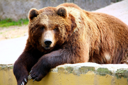

In [11]:
im = Image.open(dest)
im.to_thumb(128, 128)

这似乎工作得很好，所以让我们使用fastai的`download_images`下载每个搜索词的所有URL。我们将每个搜索词的图像放在一个单独的文件夹中：

In [12]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

In [14]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path / o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

我们的文件夹中有图像文件，正如我们所期望的那样：

In [15]:
fns = get_image_files(path)
fns

(#339) [Path('bears/teddy/e7bdbffd-20b6-46db-bbc8-8e741b8697c8.jpg'),Path('bears/teddy/7eaebb70-a5b6-46ed-a72c-1ee826207242.jpeg'),Path('bears/teddy/89258b4f-b200-43ea-bb07-f3e46ebcaa39.jpg'),Path('bears/teddy/4d4fb8f2-1563-44e2-9cd3-ccfcd9411522.jpg'),Path('bears/teddy/ec5252e7-04f7-4b0b-a10c-4eec19c4b234.jpg'),Path('bears/teddy/9e4d64eb-4d63-4300-93b7-157377ccf3f7.jpg'),Path('bears/teddy/c2fc8dda-4687-4a50-b607-51e0141a8378.png'),Path('bears/teddy/70de93b2-4acc-4070-807c-9821242208ae.png'),Path('bears/teddy/169dc63e-730c-46ec-ba49-5cad3ab8a020.jpg'),Path('bears/teddy/4ce56cfa-3663-4247-9a55-29a52aadcfa3.jpg')...]

> j：我很喜欢在Jupyter笔记本电脑上工作！逐步构建我想要的东西，并在每一步都检查我的工作，这是很容易的。我犯了很多错误，所以这对我真的很有帮助...

当我们从互联网上下载文件时，通常会有一些文件是已损坏的。让我们检查一下：


In [16]:
failed = verify_images(fns)
failed

(#16) [Path('bears/teddy/89258b4f-b200-43ea-bb07-f3e46ebcaa39.jpg'),Path('bears/teddy/1c04faff-03a4-4103-b902-48c7617b498c.png'),Path('bears/teddy/05eb5327-063a-4c8b-964c-4b57549e1ad8.jpg'),Path('bears/teddy/2871a462-511b-43de-8dc1-ae79e87e799b.jpg'),Path('bears/teddy/e4584bfd-4183-4820-8e06-965a5954a4e7.jpg'),Path('bears/teddy/f32fc6b8-b049-426f-9d15-952d1361044d.jpg'),Path('bears/teddy/8b24f3fb-622c-4b74-9ef2-292a8562e869.png'),Path('bears/teddy/d889c634-983b-4abe-a66d-b0ddd8b4b63d.jpg'),Path('bears/teddy/857bf82d-0be3-41f3-adc8-8a1b0dab5439.jpg'),Path('bears/teddy/82d12313-dba7-4e96-a44b-81b4e84418fb.png')...]

要删除所有受损的图像，可以对每个图像使用`unlink`。请注意，与大多数返回集合的fastai函数一样，`verify_images`返回类型为`L`的对象，该对象包含一个`map`方法。这将在集合的每个元素上调用传递的函数：

In [17]:
failed.map(Path.unlink)

(#16) [None,None,None,None,None,None,None,None,None,None...]

### 旁记：在Jupyter笔记本中获取帮助

Jupyter notebook非常适合进行实验并立即看到每个函数的结果，但也有很多功能可以帮助您了解如何使用不同的函数，甚至直接查看它们的源代码。例如，如果你写入一个单元格：
```
??verify_images
```
将弹出一个窗口，其中包含：
```
Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in
             enumerate(parallel(verify_image, fns)) if not o)
File:      ~/git/fastai/fastai/vision/utils.py
Type:      function
```
这告诉我们函数接受什么参数（`fns`），然后显示源代码和它来自的文件。通过查看源代码，我们可以看到它并行地应用了函数`verify_image`，并且只保留该函数结果为`False`的图像文件，这与文档注释描述一致：它在`fns`中查找无法打开的图像。

以下是Jupyter notebook中非常有用的其他一些功能：

- 在任何时候，如果您不记得函数或参数名称的确切拼写，可以按Tab键获取自动补全建议。
- 当位于函数的括号内时，同时按下Shift和Tab键将显示一个窗口，其中包含函数的签名和简短描述。按两次这些键将展开文档，按三次将在屏幕底部打开一个完整的窗口，其中包含相同的信息。
- 在单元格里输入`?func_name`并执行，将打开一个带有函数签名和简短描述的窗口。
- 在单元格里输入`??func_name`并且执行，将打开一个窗口，其中包含函数的签名、简短描述和源代码。
- 如果您正在使用fastai库，我们为您添加了一个`doc`函数：在单元格中执行`doc(func_name)`将打开一个窗口，其中包含该函数的签名、简短描述和GitHub上源代码的链接，以及[库文档](https://docs.fast.ai/)中该函数的完整文档。
- 与文档无关，但仍然非常有用：要在出现错误时随时获得帮助，请在下一个单元格中键入`%debug`并执行以打开[Python调试器](https://docs.python.org/3/library/pdb.html)，该调试器将允许您检查每个变量的内容。

### 结束旁记

在这个过程中需要注意的一点是：正如我们在<<chapter_intro>>中所讨论的，模型只能反映用于训练它们的数据。世界上到处都是有偏见的数据，这些数据最终反映在例如Bing图像搜索（我们用来创建数据集）中。例如，假设你有兴趣创建一个可以帮助用户判断自己是否拥有健康皮肤的应用程序，所以你根据搜索（比如）“健康皮肤”的结果训练了一个模型。<healthy_skin>>向您展示您将获得的各种结果。

![](../images/02.production/healthy_skin.gif)